# Custom Dataset with roboflow

In this notebook, we’ll walk through how to create and use a custom dataset with Roboflow, fine-tune an [RF-DETR](https://roboflow.com/model/rf-detr) model on it, and then visualize the results using [Supervision](https://supervision.roboflow.com/latest/).

We’ll begin by installing the required dependencies and setting the Roboflow API key as an environment variable.

In [ ]:
!pip install -q rfdetr==1.2.1 supervision==0.26.1 roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 kB 6.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 116.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.8/372.8 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Get the Dataset from Universe

In [ ]:
import os
from google.colab import userdata

os.environ["ROBOFLOW_API_KEY"] = userdata.get("ROBOFLOW_API_KEY")

In [ ]:
from roboflow import download_dataset

dataset = download_dataset("https://universe.roboflow.com/roboflow-jvuqo/poker-cards-fmjio/dataset/4", "coco")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to poker-cards-4 in coco:: 100%|██████████| 907/907 [00:00<00:00, 6403.81it/s]


## Fine-tuning RF-DETR

In [4]:
from rfdetr import RFDETRSmall

model = RFDETRSmall()

model.train(dataset_dir=dataset.location, epochs=10, batch_size=8, grad_accum_steps=2)

rf-detr-small.pth: 100%|██████████| 368M/368M [00:04<00:00, 88.1MiB/s]


Using a different number of positional encodings than DINOv2, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Using patch size 16 instead of 14, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Loading pretrain weights


reinitializing your detection head with 53 classes.


TensorBoard logging initialized. To monitor logs, use 'tensorboard --logdir output' and open http://localhost:6006/ in browser.
Not using distributed mode
git:
  sha: N/A, status: clean, branch: N/A

Namespace(num_classes=53, grad_accum_steps=2, amp=True, lr=0.0001, lr_encoder=0.00015, batch_size=8, weight_decay=0.0001, epochs=10, lr_drop=100, clip_max_norm=0.1, lr_vit_layer_decay=0.8, lr_component_decay=0.7, do_benchmark=False, dropout=0, drop_path=0.0, drop_mode='standard', drop_schedule='constant', cutoff_epoch=0, pretrained_encoder=None, pretrain_weights='rf-detr-small.pth', pretrain_exclude_keys=None, pretrain_keys_modify_to_load=None, pretrained_distiller=None, encoder='dinov2_windowed_small', vit_encoder_num_layers=12, window_block_indexes=None, position_embedding='sine', out_feature_indexes=[3, 6, 9, 12], freeze_encoder=False, layer_norm=True, rms_norm=False, backbone_lora=False, force_no_pretrain=False, dec_layers=3, dim_feedforward=2048, hidden_dim=256, sa_nheads=8, ca_nheads

Epoch: [0]  [ 0/50]  eta: 0:11:47  lr: 0.000100  class_error: 98.93  loss: 7.6644 (7.6644)  loss_ce: 1.3467 (1.3467)  loss_bbox: 0.2282 (0.2282)  loss_giou: 0.2117 (0.2117)  loss_ce_0: 1.2981 (1.2981)  loss_bbox_0: 0.3732 (0.3732)  loss_giou_0: 0.3011 (0.3011)  loss_ce_1: 1.3363 (1.3363)  loss_bbox_1: 0.2520 (0.2520)  loss_giou_1: 0.2306 (0.2306)  loss_ce_enc: 1.2427 (1.2427)  loss_bbox_enc: 0.4507 (0.4507)  loss_giou_enc: 0.3931 (0.3931)  loss_ce_unscaled: 1.3467 (1.3467)  class_error_unscaled: 98.9316 (98.9316)  loss_bbox_unscaled: 0.0456 (0.0456)  loss_giou_unscaled: 0.1058 (0.1058)  cardinality_error_unscaled: 3867.6250 (3867.6250)  loss_ce_0_unscaled: 1.2981 (1.2981)  loss_bbox_0_unscaled: 0.0746 (0.0746)  loss_giou_0_unscaled: 0.1506 (0.1506)  cardinality_error_0_unscaled: 3830.0000 (3830.0000)  loss_ce_1_unscaled: 1.3363 (1.3363)  loss_bbox_1_unscaled: 0.0504 (0.0504)  loss_giou_1_unscaled: 0.1153 (0.1153)  cardinality_error_1_unscaled: 3893.6250 (3893.6250)  loss_ce_enc_unscale

Test:  [0/6]  eta: 0:00:05  class_error: 64.71  loss: 6.7735 (6.7735)  loss_ce: 1.4219 (1.4219)  loss_bbox: 0.1258 (0.1258)  loss_giou: 0.1312 (0.1312)  loss_ce_0: 1.4375 (1.4375)  loss_bbox_0: 0.1301 (0.1301)  loss_giou_0: 0.1340 (0.1340)  loss_ce_1: 1.4219 (1.4219)  loss_bbox_1: 0.1370 (0.1370)  loss_giou_1: 0.1439 (0.1439)  loss_ce_enc: 1.4375 (1.4375)  loss_bbox_enc: 0.1225 (0.1225)  loss_giou_enc: 0.1302 (0.1302)  loss_ce_unscaled: 1.4219 (1.4219)  class_error_unscaled: 64.7059 (64.7059)  loss_bbox_unscaled: 0.0252 (0.0252)  loss_giou_unscaled: 0.0656 (0.0656)  cardinality_error_unscaled: 293.7500 (293.7500)  loss_ce_0_unscaled: 1.4375 (1.4375)  loss_bbox_0_unscaled: 0.0260 (0.0260)  loss_giou_0_unscaled: 0.0670 (0.0670)  cardinality_error_0_unscaled: 294.8750 (294.8750)  loss_ce_1_unscaled: 1.4219 (1.4219)  loss_bbox_1_unscaled: 0.0274 (0.0274)  loss_giou_1_unscaled: 0.0719 (0.0719)  cardinality_error_1_unscaled: 294.5000 (294.5000)  loss_ce_enc_unscaled: 1.4375 (1.4375)  loss_bb

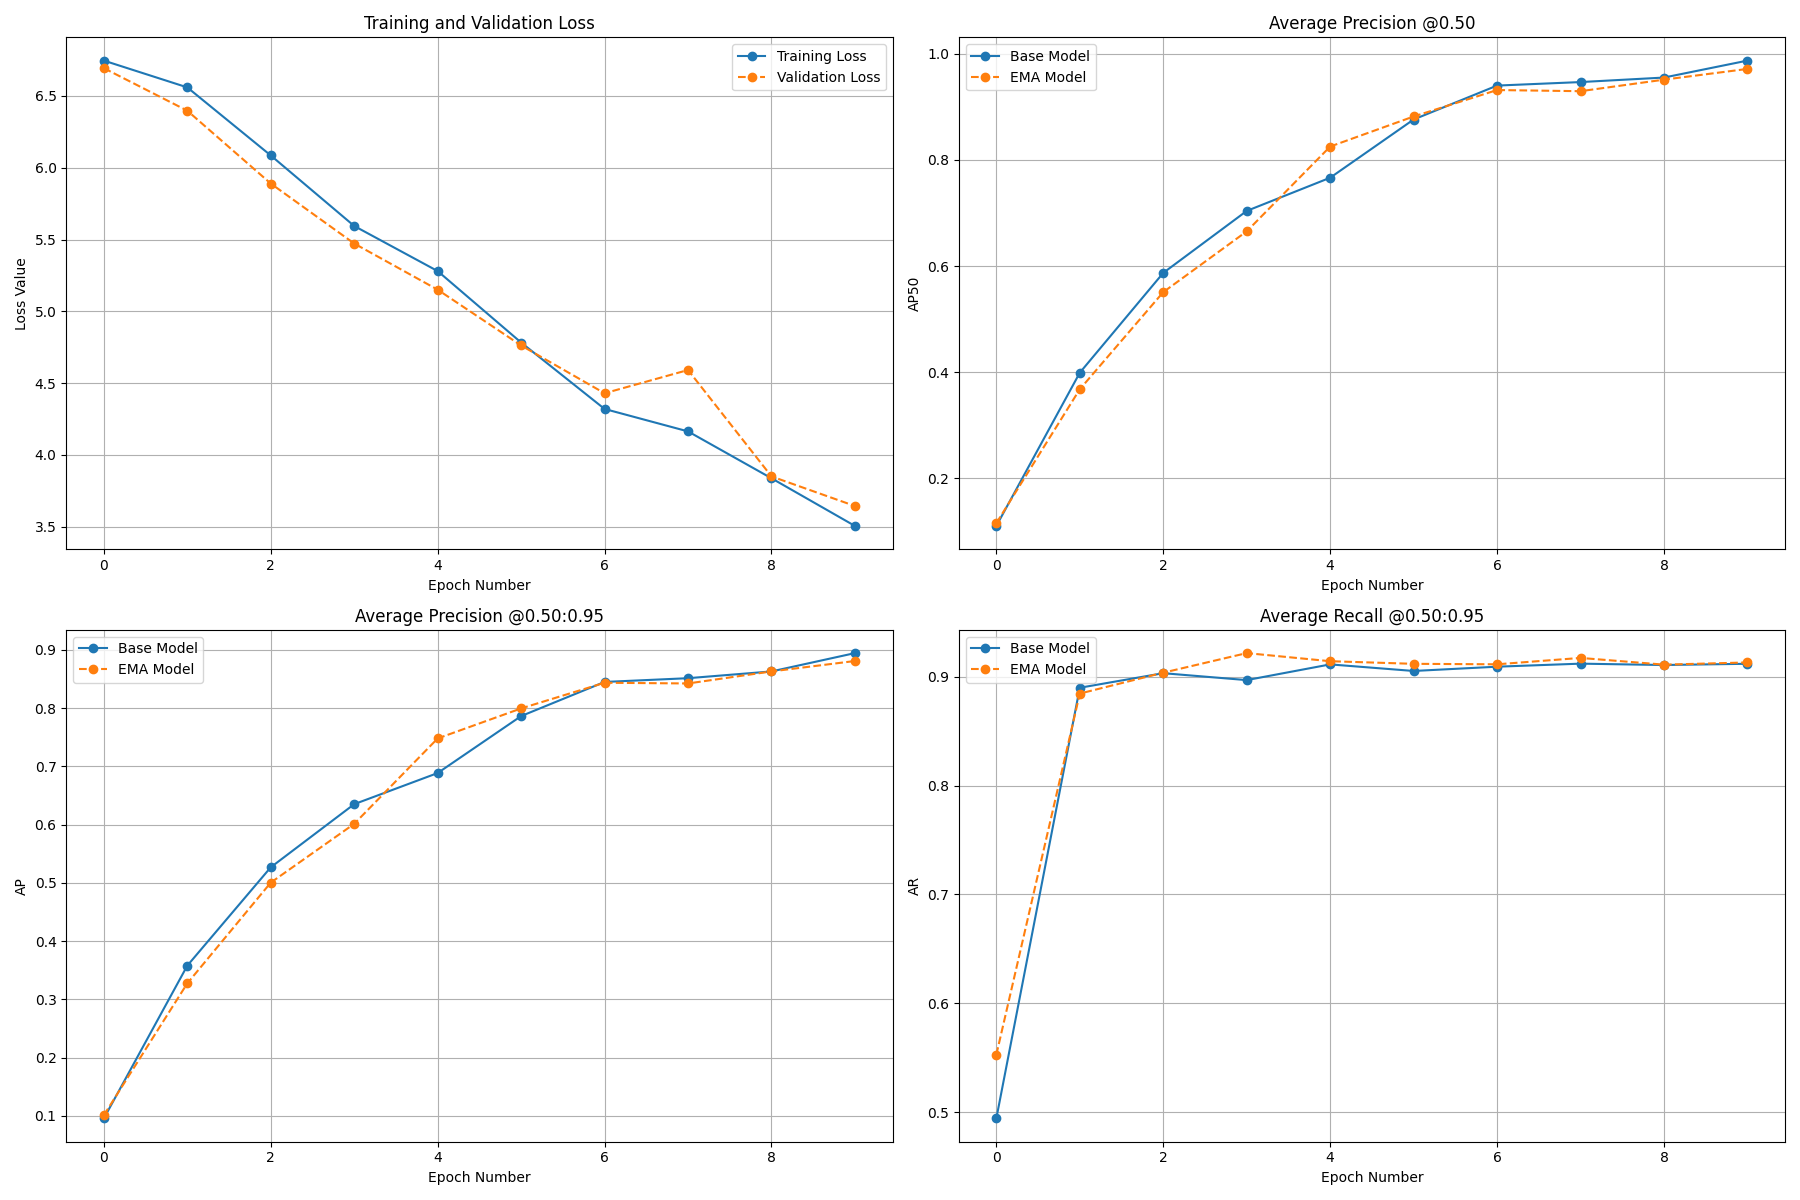

In [5]:
from PIL import Image

Image.open("/content/output/metrics_plot.png")

## Visualization With Supervision

In [6]:
import supervision as sv

ds = sv.DetectionDataset.from_coco(
    images_directory_path=f"{dataset.location}/test",
    annotations_path=f"{dataset.location}/test/_annotations.coco.json",
)

In [7]:
import supervision as sv
from tqdm import tqdm

targets = []
predictions = []

for path, image, annotations in tqdm(ds):
    image = Image.open(path)
    detections = model.predict(image, threshold=0)

    targets.append(annotations)
    predictions.append(detections)

100%|██████████| 44/44 [00:03<00:00, 13.28it/s]


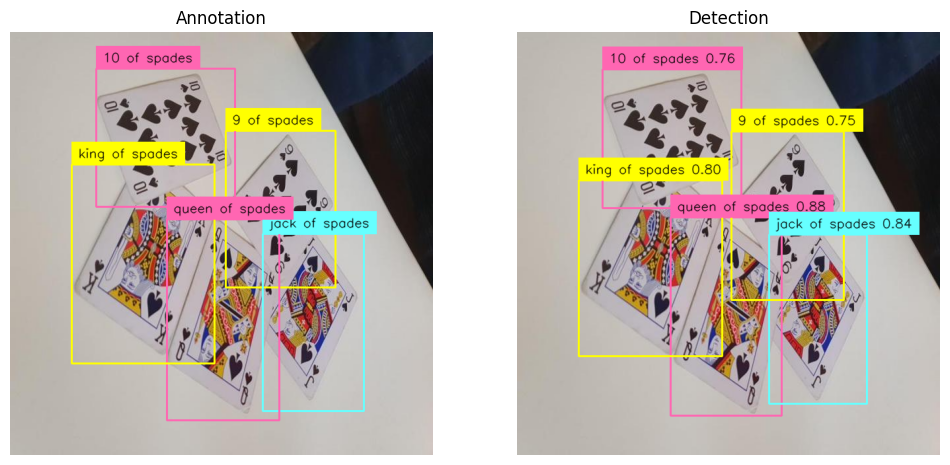

In [8]:
from rfdetr import RFDETRBase
import supervision as sv
from PIL import Image

path, image, annotations = ds[0]
image = Image.open(path)

detections = model.predict(image, threshold=0.5)

text_scale = sv.calculate_optimal_text_scale(resolution_wh=image.size)
thickness = sv.calculate_optimal_line_thickness(resolution_wh=image.size)
color = sv.ColorPalette.from_hex([
    "#ffff00", "#ff9b00", "#ff66ff", "#3399ff", "#ff66b2", "#ff8080",
    "#b266ff", "#9999ff", "#66ffff", "#33ff99", "#66ff66", "#99ff00"
])

bbox_annotator = sv.BoxAnnotator(color=color,thickness=thickness)
label_annotator = sv.LabelAnnotator(
    color=color,
    text_color=sv.Color.BLACK,
    text_scale=text_scale)

annotations_labels = [
    f"{ds.classes[class_id]}"
    for class_id
    in annotations.class_id
]

detections_labels = [
    f"{ds.classes[class_id]} {confidence:.2f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]

annotation_image = image.copy()
annotation_image = bbox_annotator.annotate(annotation_image, annotations)
annotation_image = label_annotator.annotate(annotation_image, annotations, annotations_labels)

detections_image = image.copy()
detections_image = bbox_annotator.annotate(detections_image, detections)
detections_image = label_annotator.annotate(detections_image, detections, detections_labels)

sv.plot_images_grid(images=[annotation_image, detections_image], grid_size=(1, 2), titles=["Annotation", "Detection"])